##Jupyter Notebooks for the book: 
##Semiconductor Integrated Optics for Switching Light 2nd Edition
#The nonlinear phase shift via the cascaded 2nd order nonlinearity
#Notebook for Chapter 3:

## Started July 2020

Prof. Charlie Ironside,
Department of Physics and Astronomy,
Curtin University,
Bentley Campus,
Western Australia 6102.

* email: Charlie.Ironside@curtin.edu.au

* web page address:http://oasisapps.curtin.edu.au/staff/profile/view/Charlie.Ironside

The next section calculates and plots the exchange length, fundamental depletion and nonlinear phase shift - the equation numbers are 
refering to "An All-Optical Switch Employing the Cascaded 2nd-Order Nonlinear Effect," IEEE Journal of Quantum Electronics,vol.29,pp.2650-2654,Oct1993
http://dx.doi.org/10.1109/3.250387

Jacobi Elliptic functions in python http://mpmath.org/doc/current/functions/elliptic.html




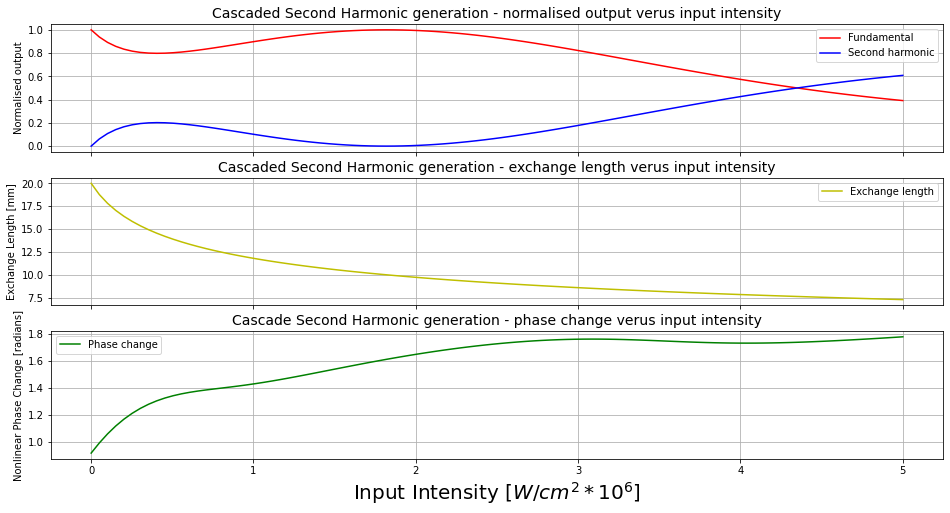

In [ ]:
from mpmath import *
import matplotlib.pyplot as plt
import numpy as np
import math
import ipywidgets as widgets
from sympy import elliptic_pi, I, pi, O, S
from sympy.abc import z, n, m
""" This calculates the cascade second harmonic effects in GaAs quasi phase matched waveguide 
- the intensity of the second harmonic,the exchange length and the nonlinear phase chage
-the equation numbers all refer to the paper An All-Optical Switch Employing the Cascaded 2nd-Order Nonlinear Effect,  """
# Materials properties for AlGaAs and device parameters for typical AlGaAs waveguide
#SI units employed
points=100#number of points to plot
n_fun=3.45 #refractive index of GaAs at 1800nm
n_SHG=3.6 #refractive index of GaAs at 900nm 
d_eff=150E-12 #Second harmonic generation coefficient for GaAs, d14
len_WG= 0.01 #length of GaAs waveguide in m
miss_match=1.0#phase mismatch in units of Pi
lambda_fun=1.5E-6 # fundamental wavelength in m
pi=3.1416 #pi
k=(2*pi)/lambda_fun # k vector 
n_diff=n_SHG-n_fun #refractive index diff
grating_period=(2*lambda_fun)/(4*n_diff-miss_match*lambda_fun) #works out grating period
sn=ellipfun('sn') #define elliptic function - see the paper An All-Optical Switch Employing the Cascaded 2nd-Order Nonlinear Effect,
snnumpy=np.frompyfunc(sn,2,1)#converts from mpmath function to numpy array function
pinumpy=np.frompyfunc(ellippi,3,1)#converts from mpmath function to numpy array function
fnumpy=np.frompyfunc(ellipf,2,1)#converts from mpmath function to numpy array function
asinumpy=np.frompyfunc(asin,1,1)#converts from mpmath function to numpy array function
intensity=np.linspace(1,5.0E6,points) #Input light intensity W/cm2 
electric_field=(intensity*1E4*377.0/n_fun)**0.5 #works out electric field from intensity using impedance of free space
gamma=k*d_eff*electric_field/((n_SHG*n_fun)**0.5)#gamma parameter see equation 5 
delta_k=abs(miss_match*pi)/len_WG #deltaKL product
eppi=(2*gamma/delta_k)**2 # see equation 6
r1sq=(1/(2*eppi))*(-1-(1+4*eppi)**0.5)# equation 12a
r2sq=(1/(2*eppi))*(-1+(1+4*eppi)**0.5)# equation 12b
deplet=1-r2sq
z=(delta_k*len_WG)/(2*(2)**0.5)*(1+2*eppi+(1+4*eppi)**0.5)**0.5 #equation 14a
zR=np.array(z,dtype=float)# converts to suitable numpy array
m=(1+2*eppi-(1+4*eppi)**0.5)/(1+2*eppi+(1+4*eppi)**0.5)#equation 14b
mR=np.array(m,dtype=float)# converts to suitable numpy array
alpha=(1+2*eppi+(1+4*eppi)**0.5)/2**0.5 #equation 18
zpp=4*sqrt(2.0)/(1+2*eppi+(1+4*eppi)**0.5)**0.5/delta_k #equation 15
zp=zpp*fnumpy(pi/2,m)#Eqn 15 - Elliptic function of the first kind EllipticK in Mathematica - NOTE it needs Pi/2 to make it complete
zpR=np.array(zp,dtype=float)# converts to suitable numpy array
fundamental_remain=1-(1-r2sq)*(snnumpy(z,m))**2 #equation 13
fundamental_remainR=np.array(fundamental_remain,dtype=float)
deplen2=2*len_WG/zpR #Needed to sort out correct value of ArcSin
phase=deplen2*pi+2*abs(asinumpy(snnumpy(z,m))-pi/2.0)#equation 17
phaseR=np.array(phase,dtype=float)# converts to suitable numpy array
for i in range(points):#accounts for the arcsin branches
    odd=int(deplen2[i])%2==1
    if odd:phaseR[i]=int(deplen2[i])*pi+2*abs(abs(asinumpy(snnumpy(zR[i],mR[i]))-pi/2))
    else :phaseR[i]=int(deplen2[i])*pi+2*abs(asinumpy(snnumpy(zR[i],mR[i])))
thetall=-pinumpy(deplet,phaseR,m)/alpha#equation 16
thetallR=np.array(thetall,dtype=float)# converts to suitable numpy array
thetanl=thetallR+abs(miss_match*pi) #equation 19
if miss_match<0:thetanl=-thetanl
""" the next bit plots the results"""
fig,a = plt.subplots(3,sharex=True, figsize=(16, 8)) #sets size of figure
a[1].set_title('Cascaded Second Harmonic generation - exchange length verus input intensity',fontsize=14) #writes title
a[0].set_title('Cascaded Second Harmonic generation - normalised output verus input intensity',fontsize=14) #writes title
a[1].set_ylabel('Exchange Length [mm]',fontsize=10)#writes y axis label
plt.xlabel('Input Intensity $[W/cm^2 * 10^6] $',fontsize=20)#writes x axis label
a[0].set_ylabel('Normalised output',fontsize=10)#writes y axis label
a[0].plot(intensity*1E-6,fundamental_remainR,'r-',label="Fundamental") #Plots intensity left in fundamental
a[0].plot(intensity*1E-6,1-fundamental_remainR,'b-',label="Second harmonic") #Plots intensity left in Second Harmonic
a[1].plot(intensity*1E-6,zpR*1E3,'y-',label="Exchange length") #Plots exchange length mm versus intensity
a[2].set_title('Cascade Second Harmonic generation - phase change verus input intensity',fontsize=14) #writes title
a[2].set_ylabel('Nonlinear Phase Change [radians]',fontsize=10)#writes y axis label
a[2].plot(intensity*1E-6,thetanl,'g-',label="Phase change")#Plots exchange length mm versus intensity
a[2].legend(loc=0)#writes legend on graph
a[2].grid()#writes grid on graph
a[0].legend(loc=0)#writes legend on graph
a[1].legend(loc=0)#writes legend on graph
a[0].grid()#writes grid on graph
a[1].grid()#writes grid on graph
plt.show()